In [249]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trains/Assignment2_q2_dataset.csv


In [250]:
df=pd.read_csv('/kaggle/input/trains/Assignment2_q2_dataset.csv')

In [251]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [252]:
df.shape

(14620, 23)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [254]:
df=df.astype(float)

In [255]:
df.shape

(14620, 23)

In [256]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df=df_scaled


In [257]:
df['d']=[1]*14620

In [258]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,d
0,0.005788,0.0,0.12500,0.266667,0.249051,0.007945,0.4,0.0,1.0,1.00,...,0.0,0.000000,0.769825,0.126246,0.428319,0.008481,0.5,0.266667,0.302020,1
1,0.028477,0.0,0.09375,0.266667,0.193622,0.003241,0.2,0.0,0.0,1.00,...,0.0,0.014493,0.807303,0.198505,0.355752,0.005981,0.5,0.033333,0.173445,1
2,0.045286,0.0,0.12500,0.300000,0.192863,0.008345,0.2,0.0,0.0,0.50,...,0.0,0.014493,0.803120,0.200166,0.438938,0.010624,0.0,0.100000,0.147205,1
3,0.119698,0.0,0.09375,0.266667,0.223235,0.039562,0.4,0.0,0.0,0.50,...,0.0,0.028986,0.912498,0.322259,0.511504,0.075355,1.0,0.866667,0.099711,1
4,0.134238,0.0,0.06250,0.200000,0.177677,0.003707,0.2,0.0,0.0,0.75,...,0.0,0.043478,0.834486,0.186047,0.283186,0.006874,0.0,0.033333,0.095382,1


In [259]:
y=df['Price']

In [260]:
df=df.drop(columns=['id','Date','Price'])

In [261]:
df = df.to_numpy()

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(df, y, test_size=0.2)

In [263]:
X_train.shape

(11696, 21)

In [264]:
#X_train.head()

In [265]:
#X_train.info()

In [266]:
    import numpy as np


    np.random.seed(42)
    parameters = {}

    # Hidden layer 1
    w1= np.random.randn(21,32) * 0.01


    # Hidden layer 2
    w2= np.random.randn(32,32) * 0.01

    # Output layer
    w3 = np.random.randn(32,1) * 0.01

In [267]:
import numpy as np

def sigmoid(x):
 
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
   
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def relu(x):
    
    return np.maximum(0, x)

def relu_derivative(x):
   
    return np.where(x > 0, 1, 0)



In [268]:
a3.shape

(11696, 1)

In [269]:
Y_train_reshaped = Y_train.to_numpy().reshape((11696, 1))


In [270]:
import numpy as np

def mean_squared_error(y_true, y_pred):
     return np.mean((y_true - y_pred) ** 2)



In [271]:
a2.shape

(11696, 32)

In [272]:
dZ3.shape

(11696, 1)

In [273]:
w3.shape

(32, 1)

In [274]:
cost=mean_squared_error(Y_train_reshaped,a3)
cost

0.0023986118936352367

In [275]:
costs = []
for epoch in range(3000):
    z1 = np.dot(X_train, w1)
    a1=sigmoid(z1)
    z2= np.dot(a1, w2)
    a2=sigmoid(z2)
    z3= np.dot(a2, w3)
    a3=sigmoid(z3)
    #cost
    cost=mean_squared_error(Y_train_reshaped,a3)
    lambda_reg = 0.01
    learning_rate = 0.01
    reg_term_w1 = lambda_reg * w1
    reg_term_w2 = lambda_reg * w2
    reg_term_w3 = lambda_reg * w3
    costs.append(cost)
    Y=Y_train_reshaped
    m = Y.shape[0]
    
    if epoch % 100 == 0:
        print(f"Cost after epoch {epoch}: {cost}")
    
    #derivative
    dZ3 = (a3 - Y)*sigmoid_derivative(z3)
    dW3 = np.dot(a2.T,dZ3) / m
    #db3 = np.sum(dZ3, axis=1, keepdims=True) / m

    dZ2 = np.dot( dZ3,w3.T) * sigmoid_derivative(z2)
    dW2 = np.dot(a1.T,dZ2) / m
    #db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(dZ2,w2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T,dZ1) / m
    
    #updation
    
    learning_rate = 0.01
    w1 -= learning_rate * (dW1 + reg_term_w1)
    w2 -= learning_rate * (dW2 + reg_term_w2)
    w3 -= learning_rate * (dW3 + reg_term_w3)
        



Cost after epoch 0: 0.20123744936340515
Cost after epoch 100: 0.08030912824989181
Cost after epoch 200: 0.04139909895446271
Cost after epoch 300: 0.02584564807570513
Cost after epoch 400: 0.0182109468795216
Cost after epoch 500: 0.013900209117575966
Cost after epoch 600: 0.011220594777181878
Cost after epoch 700: 0.00943610904649379
Cost after epoch 800: 0.00818508719493802
Cost after epoch 900: 0.007272620313788205
Cost after epoch 1000: 0.006585877596267978
Cost after epoch 1100: 0.006055720761898633
Cost after epoch 1200: 0.005637781801824312
Cost after epoch 1300: 0.0053024790642302805
Cost after epoch 1400: 0.005029445293664314
Cost after epoch 1500: 0.004804268016802187
Cost after epoch 1600: 0.00461650475196858
Cost after epoch 1700: 0.004458432100692561
Cost after epoch 1800: 0.004324233399841611
Cost after epoch 1900: 0.004209457138592297
Cost after epoch 2000: 0.0041106474099959975
Cost after epoch 2100: 0.00402508648390396
Cost after epoch 2200: 0.003950612132072243
Cost aft

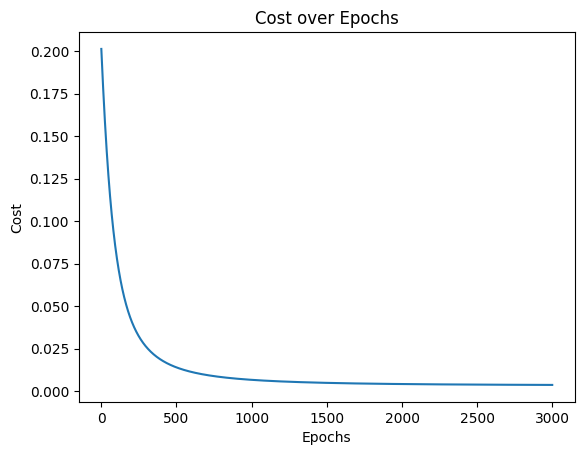

In [278]:
import matplotlib.pyplot as plt  # Importing matplotlib

plt.plot(range(3000), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over Epochs')
plt.show()


In [279]:
z1_test = np.dot(X_val_and_test, w1)
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, w2)
a2_test = relu(z2_test)
z3_test = np.dot(a2_test, w3)
a3_test = sigmoid(z3_test)

In [280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_test = mean_squared_error(Y_val_and_test, a3_test)
mae_test = mean_absolute_error(Y_val_and_test, a3_test)

In [281]:
print(mse_test,mae_test)

0.19412954694289997 0.4378850067965922


In [282]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_test = r2_score(Y_val_and_test, a3_test)
print(r2_test)


-80.40016717659488
